In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data cleaning

In [8]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
# The dataset is divided into two regions

In [10]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [12]:
df[['Region']]=df[['Region']].astype(int)

In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [14]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

### Removing null values

In [15]:
df.dropna().reset_index(drop=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [17]:
df=df.drop(122).reset_index(drop=True)

In [18]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

### fixing spaces in column names

In [20]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### change the required columns as integer data type

In [21]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [22]:
non_numeric_values = df['month'].loc[df['month'].str.isdigit() == False]

# Print the non-numeric values for inspection
print("Non-numeric values in 'month' column:", non_numeric_values)

Non-numeric values in 'month' column: 122    month
Name: month, dtype: object


In [23]:
df = df[df['month'].str.isdigit()]



In [24]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 244
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int32 
 1   month        244 non-null    int32 
 2   year         244 non-null    int32 
 3   Temperature  244 non-null    int32 
 4   RH           244 non-null    int32 
 5   Ws           244 non-null    int32 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 23.8+ KB


### changing the other columns to float datatype

In [25]:
obj=[features for features in df.columns if df[features].dtypes=='O']

In [26]:
obj

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [27]:
df=df.drop(165).reset_index(drop=True)

In [28]:
df[df['DC']=='14.6 9']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
164,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [29]:
df=df.drop(164).reset_index(drop=True)

In [30]:
df[df['DC']=='14.6 9']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [31]:
for i in obj:
    if i!='Classes':
        df[i].astype(float)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    int32 
 1   month        242 non-null    int32 
 2   year         242 non-null    int32 
 3   Temperature  242 non-null    int32 
 4   RH           242 non-null    int32 
 5   Ws           242 non-null    int32 
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
 14  Region       242 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 21.9+ KB


In [33]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


## save the cleaned dataset


In [34]:
df.to_csv("Algerian_cleaned.csv",index=False)

### Exploratory Data Analysis

In [35]:
df_cp=df.drop(['day','month','year'],axis=1)
df_cp.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


## Encoding of categories in calsses


In [36]:
df_cp.Classes.value_counts()

Classes
fire             130
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [37]:
df_cp['Classes']=np.where(df_cp['Classes'].str.contains('not fire'),0,1)

In [38]:
df_cp.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0


In [39]:
df_cp['Classes'].value_counts()

Classes
1    136
0    106
Name: count, dtype: int64

## Plot density plot for all features

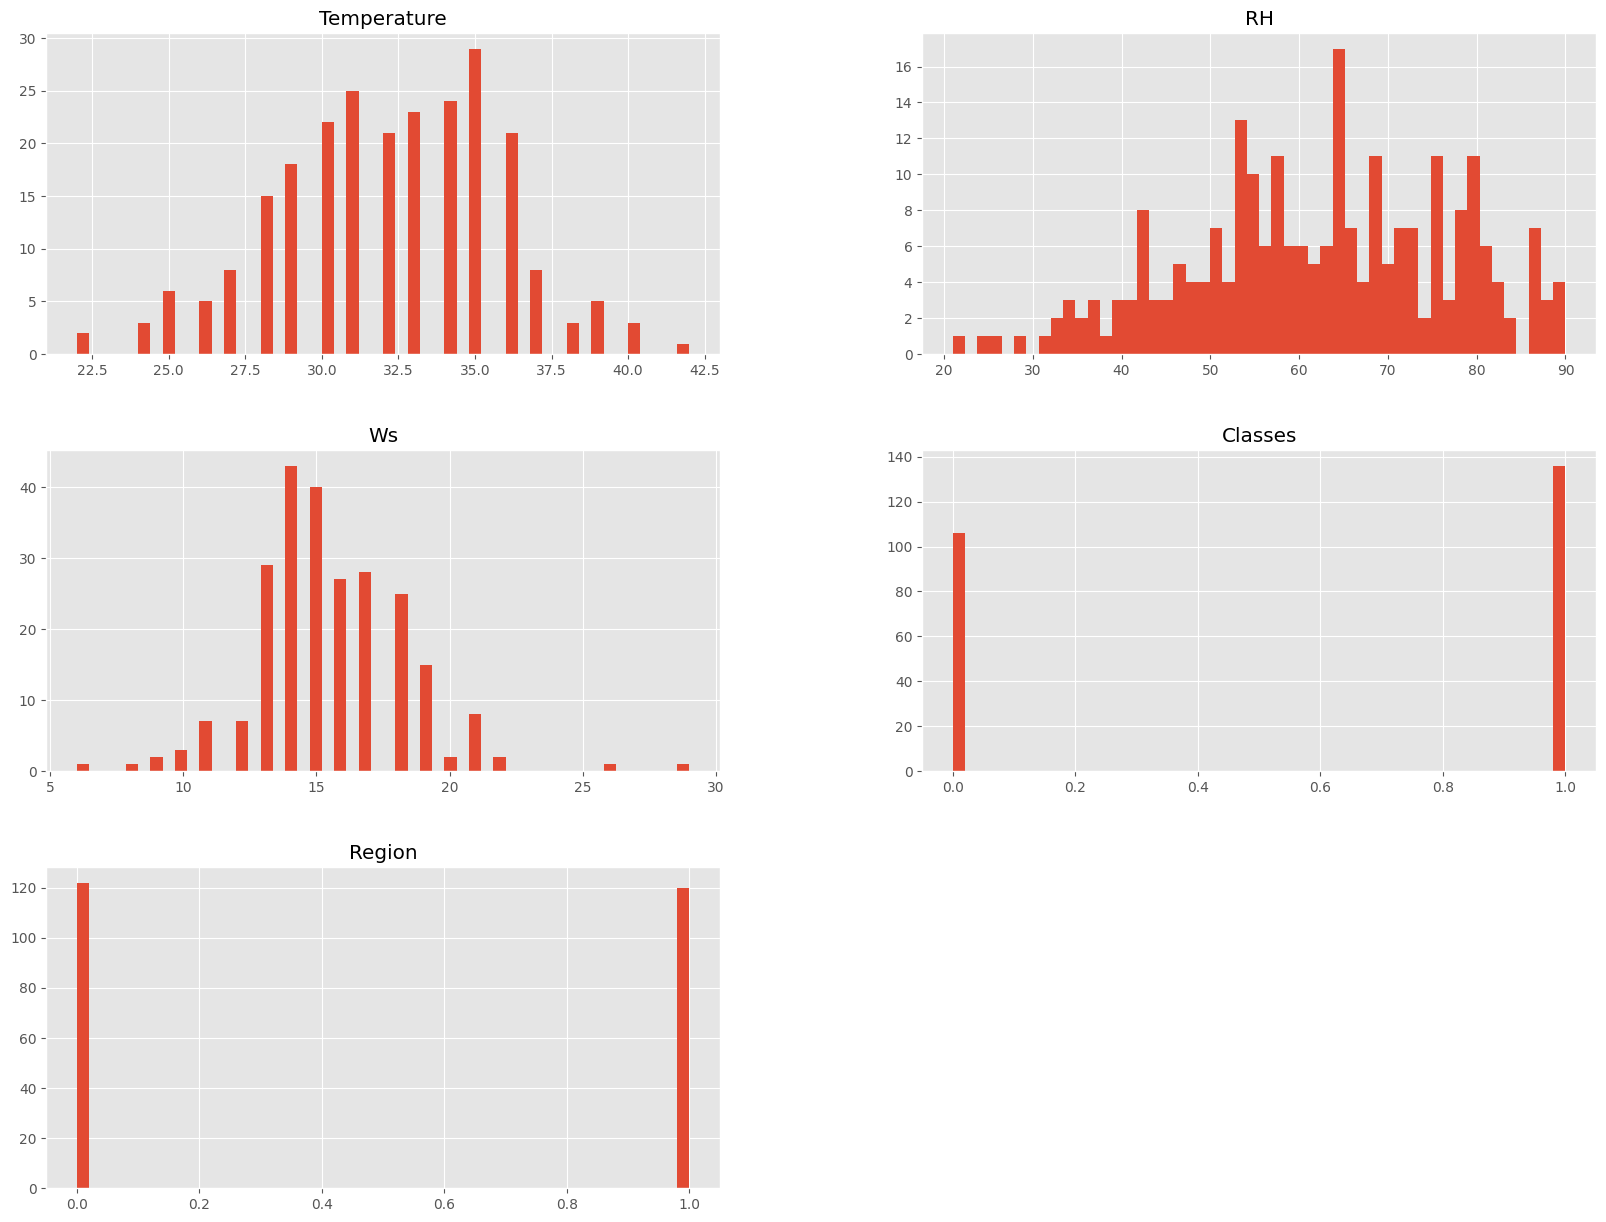

In [40]:
plt.style.use('ggplot')
df_cp.hist(bins=50,figsize=(20,15))
plt.show()

### Percentage of pie chart 


In [41]:
percentage=df_cp['Classes'].value_counts(normalize=True)*100

## Plotting piechart

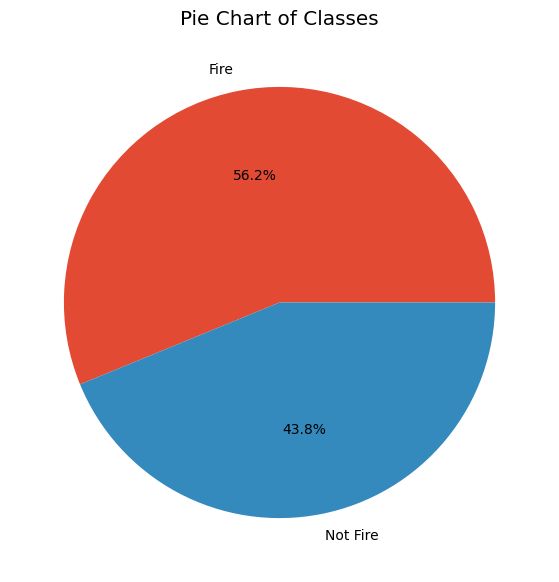

In [42]:
labels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=labels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

## Correlation

In [43]:
df_cp.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.648982,-0.280095,-0.328295,0.677949,0.491545,0.386094,0.609435,0.466597,0.573499,0.513768,0.264215
RH,-0.648982,1.000000,0.240872,0.222582,-0.644548,-0.411011,-0.231804,-0.689205,-0.356883,-0.584175,-0.429840,-0.399832
Ws,-0.280095,0.240872,1.000000,0.171489,-0.165021,-0.001728,0.076351,0.008065,0.030000,0.031270,-0.066949,-0.178133
Rain,-0.328295,0.222582,0.171489,1.000000,-0.544037,-0.288914,-0.298719,-0.347545,-0.300096,-0.324598,-0.379413,-0.039758
FFMC,0.677949,-0.644548,-0.165021,-0.544037,1.000000,0.604611,0.510127,0.740715,0.593404,0.692319,0.769275,0.220689
DMC,0.491545,-0.411011,-0.001728,-0.288914,0.604611,1.000000,0.876353,0.680436,0.982277,0.875823,0.587682,0.193657
DC,0.386094,-0.231804,0.076351,-0.298719,0.510127,0.876353,1.000000,0.508926,0.942241,0.739635,0.515647,-0.075592
ISI,0.609435,-0.689205,0.008065,-0.347545,0.740715,0.680436,0.508926,1.000000,0.644116,0.922946,0.736878,0.264300
BUI,0.466597,-0.356883,0.030000,-0.300096,0.593404,0.982277,0.942241,0.644116,1.000000,0.857913,0.589267,0.091322
FWI,0.573499,-0.584175,0.031270,-0.324598,0.692319,0.875823,0.739635,0.922946,0.857913,1.000000,0.721661,0.198863


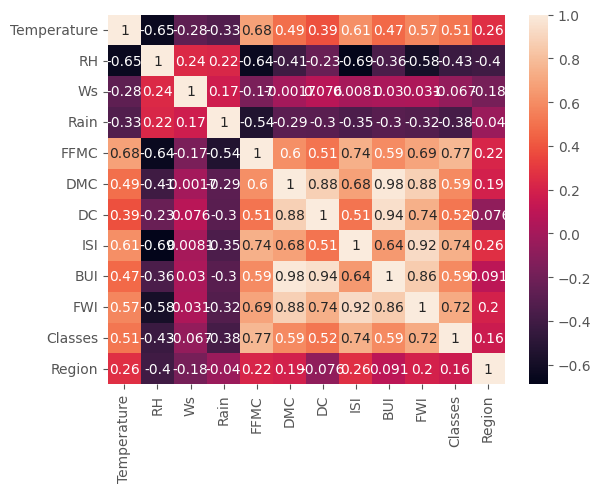

In [44]:
sns.heatmap(df_cp.corr(),annot=True)
plt.show()

## Box Plots


<Axes: ylabel='FWI'>

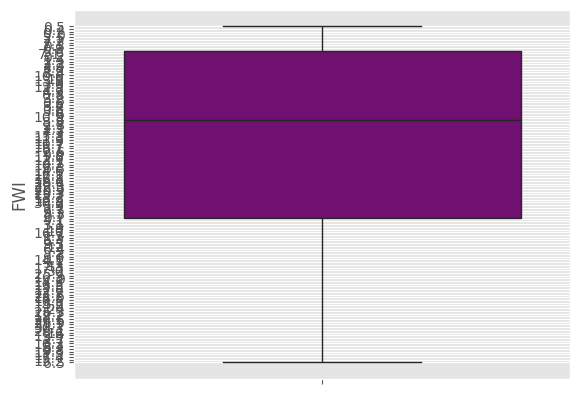

In [45]:
sns.boxplot(df_cp['FWI'],color='purple')

### Monthly Fire Analysis

In [46]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

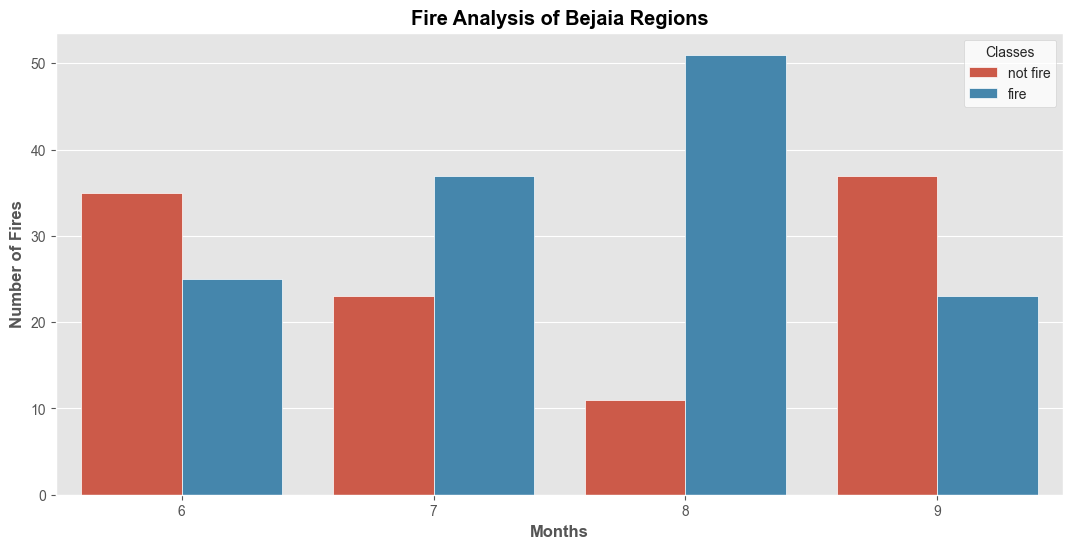

In [47]:
df_temp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel("Number of Fires",weight='bold')
plt.xlabel("Months",weight='bold')
plt.title("Fire Analysis of Bejaia Regions",weight='bold')
plt.show()

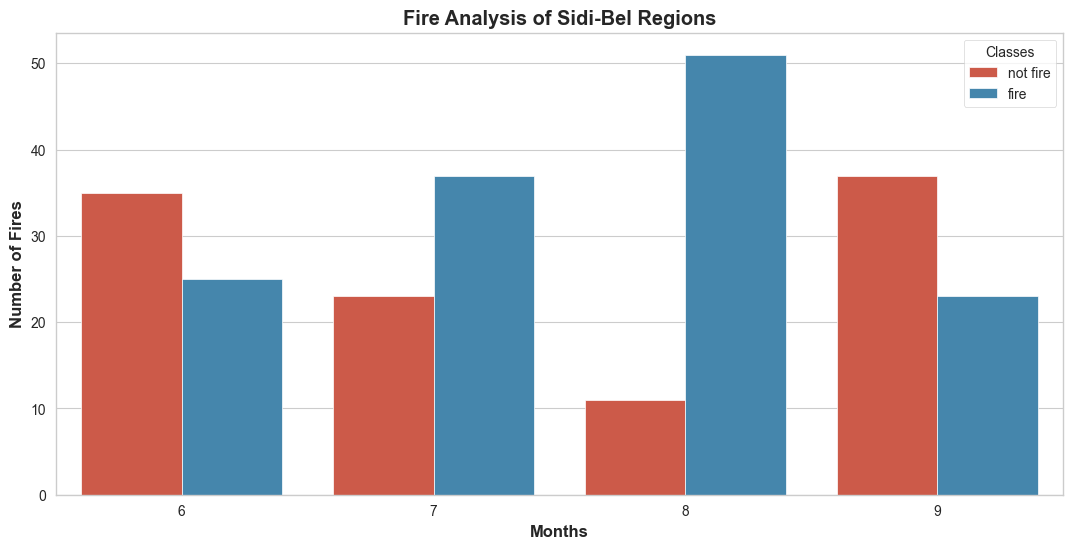

In [48]:
df_temp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel("Number of Fires",weight='bold')
plt.xlabel("Months",weight='bold')
plt.title("Fire Analysis of Sidi-Bel Regions",weight='bold')
plt.show()

## `Model Training`

In [49]:
import pandas as pd

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
df=pd.read_csv("D:\\ARWINDD\\Downloads\\Aravind\\Sem6_Spring\\Machine Learning\\ML\\Algerian_cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [52]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [53]:
df.drop(['day', 'month', 'year'], axis=1,inplace=True)

In [54]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [55]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [56]:
df.Classes.value_counts()

Classes
1    136
0    106
Name: count, dtype: int64

### Independent and dependent Features

In [57]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### Feature selection using correlation

In [59]:
df.corr().columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

## Checking MultiCollinearity

<Axes: >

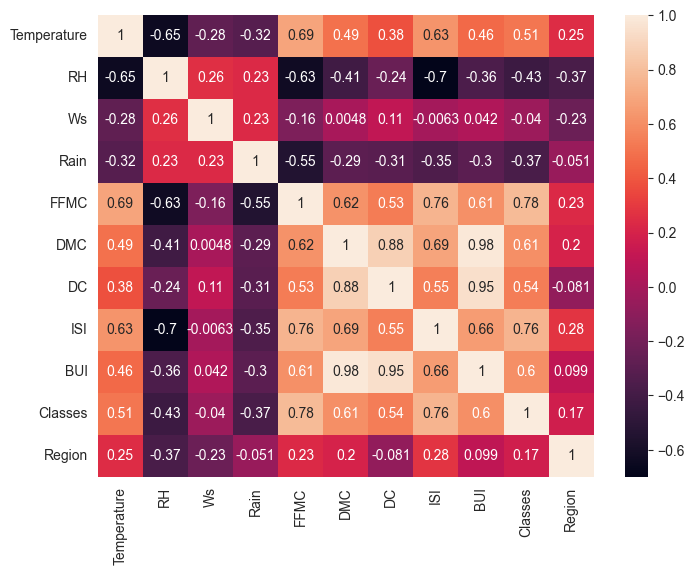

In [60]:
plt.figure(figsize=(8,6))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [61]:
def corr(dataset,ths):
    col_corr=set()
    corr_martix=dataset.corr()
    for i in range(len(corr_martix.columns)):
        for j in range(i):
            if abs(corr_martix.iloc[i,j])>ths:
                colname=corr_martix.columns[i]
                col_corr.add(colname)
    return col_corr

In [62]:
corr_features=corr(X_train,0.85)

## Drop `features` when `corr` is more than `0.85`

In [63]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)


## Feature Scaling or Standardization

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


## BoxPlot to understand the effect of Standard Scaler

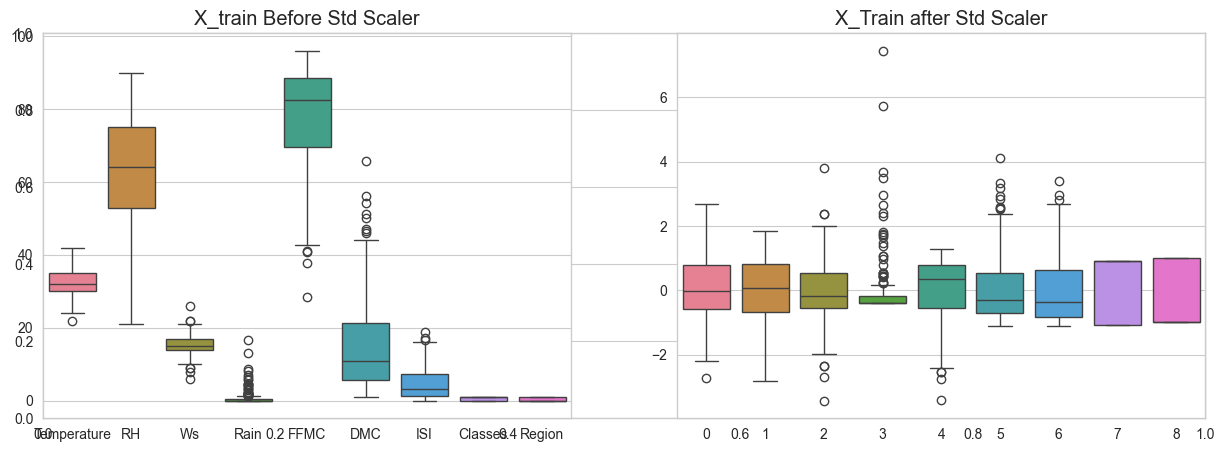

In [65]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train Before Std Scaler")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_Train after Std Scaler")
plt.show()

## `Linear` Regression Model

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [67]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print("mean_absolute_error",mae)
score=r2_score(y_test,y_pred)
print("R2_score",score)


mean_absolute_error 0.593039784830627
R2_score 0.9838272318461305


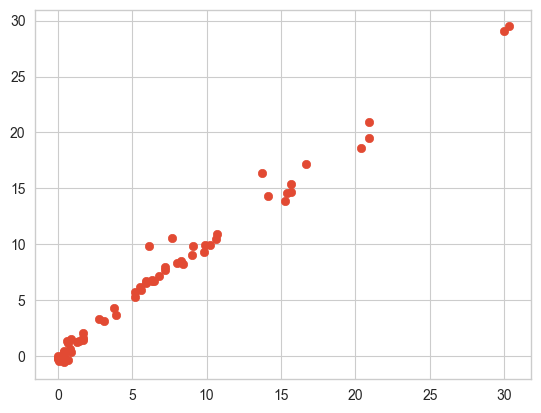

In [68]:
plt.scatter(y_test,y_pred)

## Lasso Regression

mean_absolute_error 1.144998587674602
R2_score 0.9513330568645199


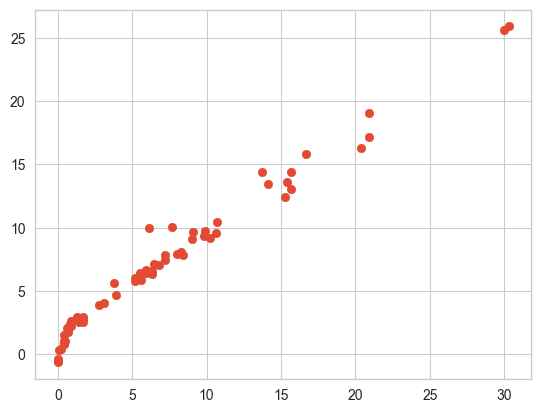

In [69]:
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print("mean_absolute_error",mae)
score=r2_score(y_test,y_pred)
print("R2_score",score)
plt.scatter(y_test,y_pred)

## Ridge Regression

mean_absolute_error 0.6164750683641291
R2_score 0.9830881894125236


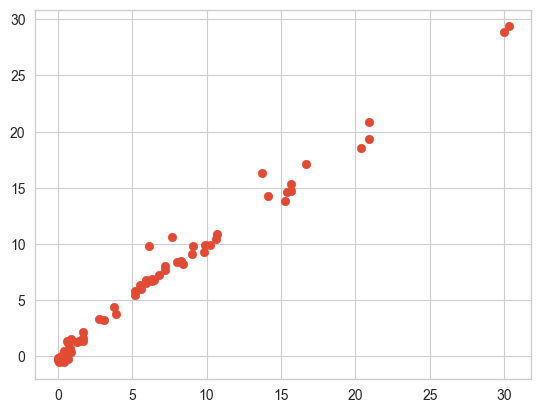

In [70]:
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print("mean_absolute_error",mae)
score=r2_score(y_test,y_pred)
print("R2_score",score)
plt.scatter(y_test,y_pred)

### ElasticNet Regression

mean_absolute_error 1.9139015163273505
R2_score 0.8746420307680666


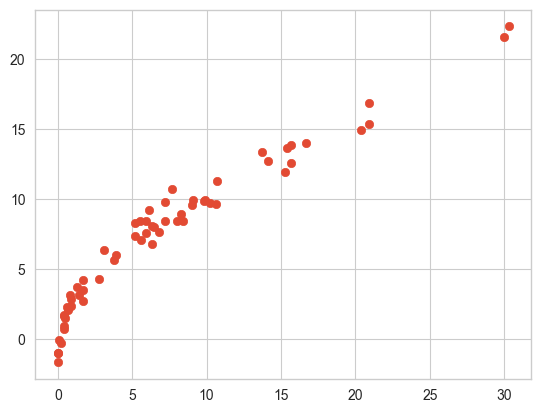

In [71]:
from sklearn.linear_model import ElasticNet
model=ElasticNet()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print("mean_absolute_error",mae)
score=r2_score(y_test,y_pred)
print("R2_score",score)
plt.scatter(y_test,y_pred)

### Class Validation

In [72]:
from sklearn.linear_model import LassoCV
lassoCv=LassoCV(cv=5)
lassoCv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [73]:
lassoCv.predict(X_test_scaled)

array([ 8.20541914,  7.68266694, -0.24442025,  6.42612961,  6.8869659 ,
       10.44549027, 10.75092912,  7.73154916,  1.96982886,  3.41328667,
        0.67450544, 10.03445303,  9.40208129, 28.63857116, 18.24967801,
        1.6633443 ,  4.77392829, -0.80214586,  7.32064884,  3.21266715,
        1.95134749,  0.12575098,  6.48058321,  0.10093821, 20.8305888 ,
       14.28970149,  5.92238574,  9.79126661, -0.94551467,  9.95295601,
        6.7921835 , -0.32565486, 10.3370505 , 14.47254729,  1.70445587,
        0.86998382,  2.11292974,  6.09098473, -0.67908226, -0.53940178,
        6.52909825,  2.05381837,  8.48903893, -0.98314504, 15.35632184,
        8.37264427,  9.90003927,  1.40387034,  0.2389906 ,  1.19820514,
       29.04106614,  5.59668242, 17.07683357, 19.26165168, 13.65957158,
       16.16612092,  1.02886359,  9.14656378,  3.94925225, 14.4413668 ,
        5.33247253])

In [74]:
lassoCv.alpha_

0.06933432697857637

In [75]:
lassoCv.alphas_

array([6.9334327 , 6.46614254, 6.03034617, 5.62392102, 5.24488757,
       4.8913997 , 4.56173573, 4.25429001, 3.9675651 , 3.70016449,
       3.45078579, 3.21821438, 3.0013175 , 2.79903875, 2.6103929 ,
       2.43446116, 2.27038662, 2.11737016, 1.9746665 , 1.84158059,
       1.71746422, 1.60171288, 1.49376279, 1.39308818, 1.2991987 ,
       1.21163705, 1.12997677, 1.05382012, 0.98279617, 0.916559  ,
       0.85478599, 0.79717627, 0.74344926, 0.69334327, 0.64661425,
       0.60303462, 0.5623921 , 0.52448876, 0.48913997, 0.45617357,
       0.425429  , 0.39675651, 0.37001645, 0.34507858, 0.32182144,
       0.30013175, 0.27990387, 0.26103929, 0.24344612, 0.22703866,
       0.21173702, 0.19746665, 0.18415806, 0.17174642, 0.16017129,
       0.14937628, 0.13930882, 0.12991987, 0.12116371, 0.11299768,
       0.10538201, 0.09827962, 0.0916559 , 0.0854786 , 0.07971763,
       0.07434493, 0.06933433, 0.06466143, 0.06030346, 0.05623921,
       0.05244888, 0.048914  , 0.04561736, 0.0425429 , 0.03967

In [76]:
lassoCv.mse_path_

array([[56.93709459, 53.11277536, 38.98258697, 75.30391649, 57.79772406],
       [51.10760214, 47.78698264, 34.25158083, 71.56490749, 51.60436243],
       [44.85481628, 42.43175741, 29.2163255 , 65.17903423, 46.19957148],
       [39.39977627, 37.671906  , 24.93915682, 59.53686042, 41.48186039],
       [34.63978051, 33.49745944, 21.31436328, 54.5474539 , 36.2625611 ],
       [30.48528874, 29.83425858, 18.25059363, 50.13132646, 31.57808623],
       [26.85832833, 26.61820205, 15.66879996, 46.21897025, 27.51094556],
       [23.69126242, 23.79292477, 13.50057318, 41.57866814, 23.97993823],
       [20.92495653, 21.30942217, 11.68686296, 36.62307409, 20.91549193],
       [18.5080034 , 19.12494494, 10.17660778, 32.29546278, 18.25605462],
       [16.39553754, 17.20203683,  8.92578645, 28.51486911, 15.9484782 ],
       [14.54879023, 15.50847931,  7.89637176, 25.21275175, 13.94656402],
       [12.93369253, 14.01567448,  7.05558353, 22.32696468, 12.21015565],
       [11.52067102, 12.69881078,  6.3

MAE 0.6807204139769432
R2 score 0.9811539995578824


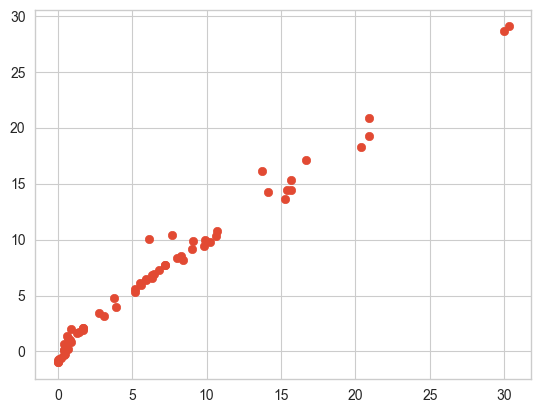

In [77]:
y_pred=lassoCv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE",mae)
print("R2 score",score)
plt.show()

### RidgeCv

0.8470636045405564
0.9739663717020344


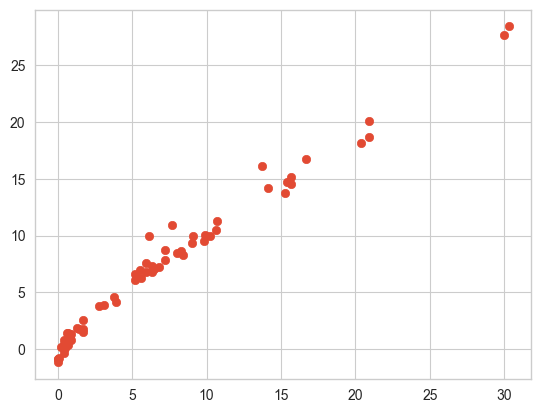

In [78]:
from sklearn.linear_model import RidgeCV
rcv=RidgeCV(cv=5)
rcv.fit(X_train_scaled,y_train)
y_pred=rcv.predict(X_test_scaled)
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.show()

In [79]:
rcv.alpha_


10.0